# **E-commerce Customer Churn Prediction**
**by : Fani Indriyaningsih**


# Business Problem Understanding

## Context

Sebuah perusahaan ritel online (E-commerce) berusaha untuk mengidentifikasi pelanggan yang kemungkinan besar akan berhenti menggunakan layanan mereka, atau yang dikenal dengan istilah "churn." Dengan memprediksi pelanggan yang berpotensi beralih ini, perusahaan dapat mengambil langkah proaktif untuk mempertahankan mereka, seperti menawarkan promosi khusus, diskon, atau insentif lainnya. Tujuan utamanya adalah untuk meningkatkan loyalitas pelanggan dan mengurangi tingkat churn, yang pada akhirnya akan mendukung operational cost dalam meminimalisir cost promosi.

Target :<br>
0 = No Churn<br>
1 = Churn

## Problem Statement

Dalam domain e-commerce, mendapatkan pelanggan baru umumnya lebih mahal daripada mempertahankan pelanggan yang sudah ada. Pelanggan biasanya pergi jika mereka tidak mendapatkan insentif yang baik. Oleh karena itu, perusahaan ingin memprediksi customer churn agar meminimalisir biaya promosi.

## Goals

Perusahaan mampu memprediksi e-commerce customer yang akan churn

## Analytic Approach

Membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi pelanggan yang terindikasi akan churn atau no churn pada e-commerce tersebut.

<!-- ![Confusion Matrix](CM.jpg) -->
<img src="confusion_matrix.jpg" alt="Python Logo" width="550" height="350">


Focus :
- FP
  <br>Dampak : Provit perusahaan kecil karna predict No churn , Actual Churn
- FN
  <br>Dampak : Biaya promosi besar yang telah dikeluarkan karna predict churn, Actual No Churn

----
Matrix Evaluation menggunakan F1 - Score
<br>F1 - Score digunakan karena pada case ini akan berfocus pada permasalahan FP dan FN

# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as missingno

from scipy.stats import stats, spearmanr, shapiro, mannwhitneyu, chi2_contingency

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, StratifiedKFold
from scipy.stats import normaltest

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

import plotly.express as px
from imblearn.pipeline import Pipeline as ImbPipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

import pickle

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

**Features**

| No. | Attribute | Description |
| --- | --- | --- |
|1.|Tenure|Masa customer berlangganan pada e-commerce|
|2.|WarehouseToHome|Jarak antara gudang dengan rumah customer|
|3.|NumberOfDeviceRegistered|Jumlah perangkat yang didaftarkan pada satu akun customer tertentu|
|4.|PreferedOrderCat|Kategori yang dipesan dalam satu bulan terakhir|
|5.|SatisfactionScore|Nilai kepuasan pelanggan terhadap layanan|
|6.|MaritalStatus|Status pernikahan customer|
|7.|NumberOfAddress|Jumlah alamat yang ditambahkan customer pada ecommerce|
|8.|Complaint|Keluhan yang diajukan dalam satu bulan terakhir|
|9.|DaySinceLastOrder|Hari terakhir pemesanan pada e-commerce|
|10.|CashbackAmount|Jumlah rata-rata cashback dalam satu bulan terakhir|
|11.|Churn|Tanda customer teridentifikasi churn atau tidak churn, <br> 0 = No Churn, 1 = Churn|

## Load Data

In [2]:
# For Google Collab
# df = pd.read_csv('/content/drive/MyDrive/Dataset/data_ecommerce_customer_churn.csv')
# df.head()

# For Local Drive
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


## Data Info

In [3]:
print(f'Jumlah baris dan kolom di dataframe df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataframe df adalah (3941, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


## Unique Values

In [4]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelUniqueValues = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelUniqueValues

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


## Missing Values

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null%', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,null%,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[17.0, 10.0]"
1,WarehouseToHome,float64,169,4.29,33,"[25.0, 6.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[6, 4]"
3,PreferedOrderCat,object,0,0.00,6,"[Others, Laptop & Accessory]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[1, 7]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[15.0, 10.0]"
9,CashbackAmount,float64,0,0.00,2335,"[151.3, 126.22]"


In [6]:
total_data = len(df)
missing = df.isna().sum().sort_values(ascending=False)
percentage = missing / total_data * 100
pd.DataFrame({'Total':missing, 'Percentage':percentage})

,Total,Percentage
DaySinceLastOrder,213,5.404720
Tenure,194,4.922608
WarehouseToHome,169,4.288252
NumberOfDeviceRegistered,0,0.000000
PreferedOrderCat,0,0.000000
SatisfactionScore,0,0.000000
MaritalStatus,0,0.000000
NumberOfAddress,0,0.000000
Complain,0,0.000000
CashbackAmount,0,0.000000


Terdapat 3 kolom yang memiliki missing values (bernilai Nan), yaitu:
1. DaySinceLastOrder sebesar 5.4%
2. Tenure sebesar 5%
3. WarehouseToHome sebesar 4.2%

<Axes: >

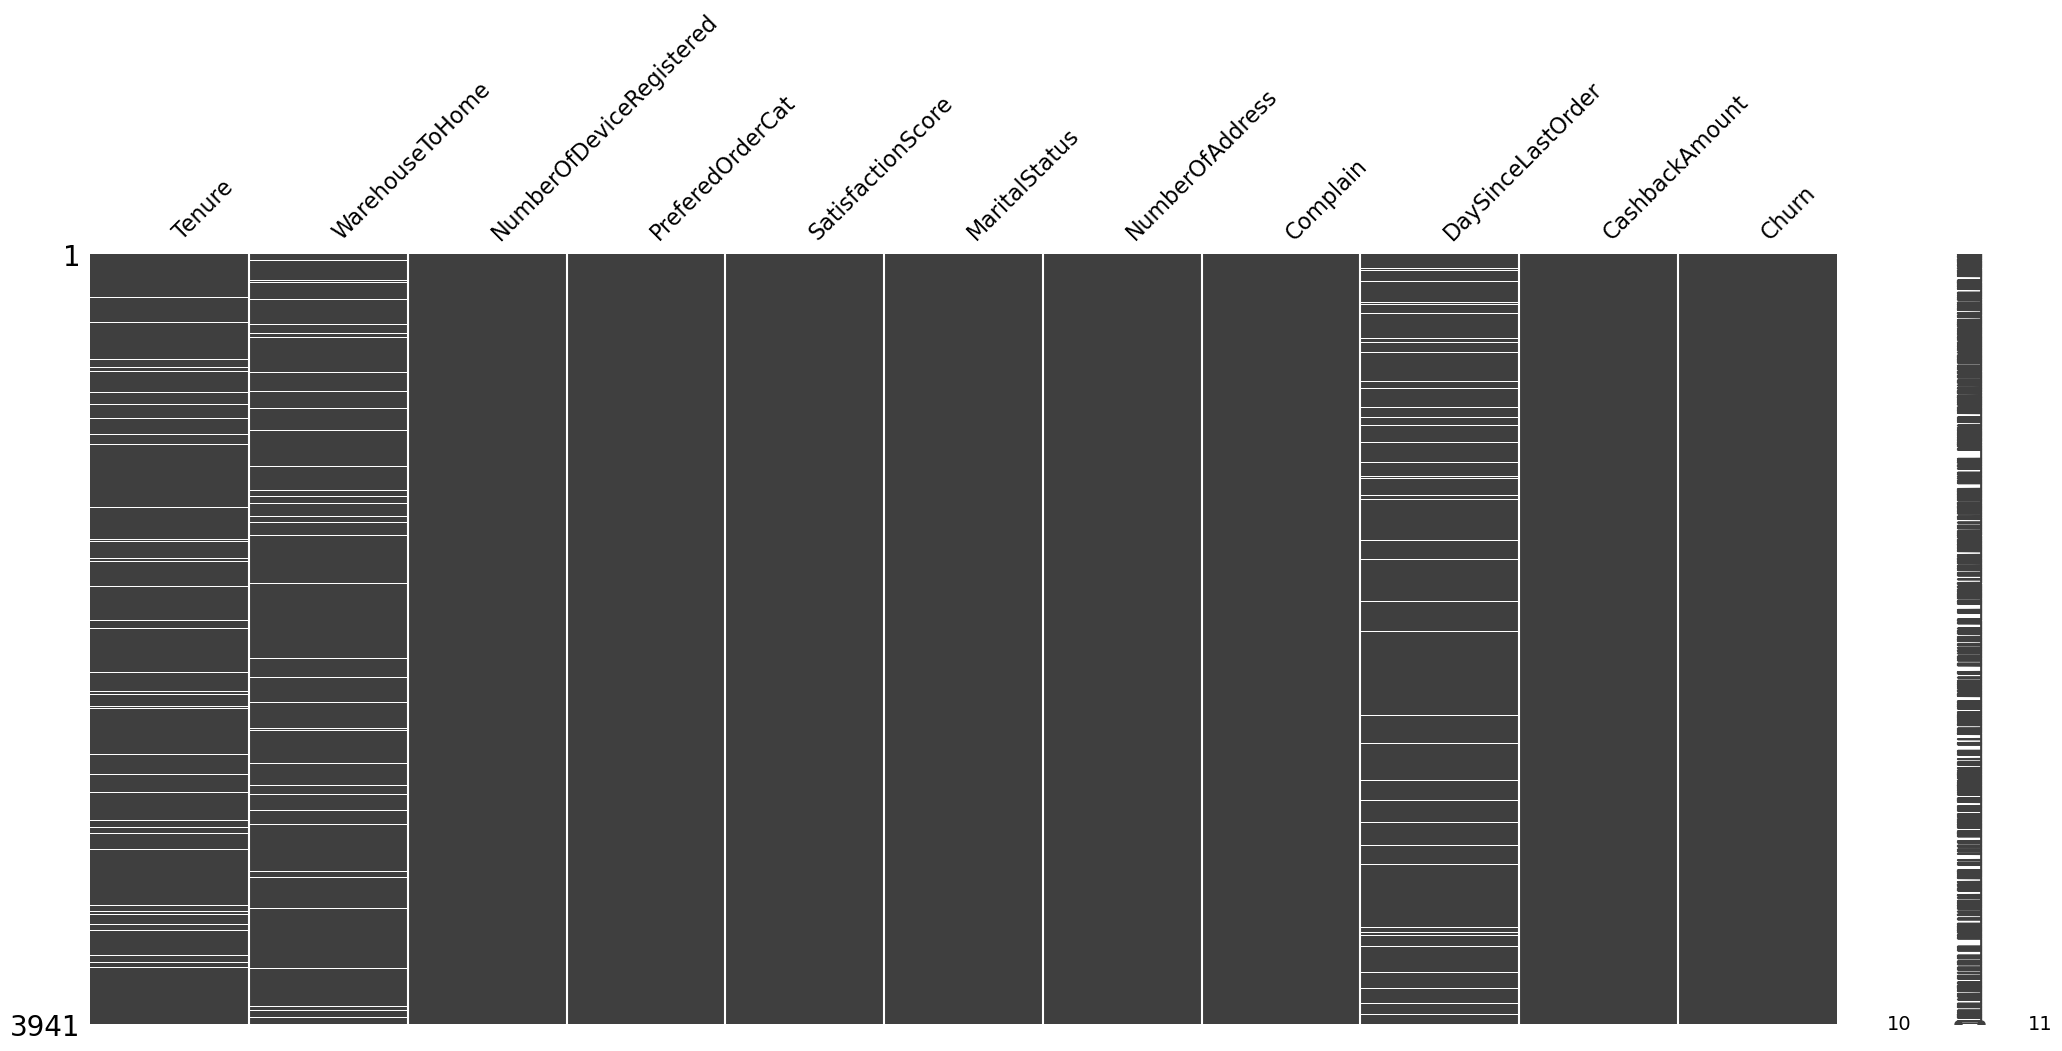

In [7]:
missingno.matrix(df)

Berdasarkan matrix correlation diatas, missing values termasuk kategori (Missing Completely at Random) atau missing data tidak ada hubungan antara missing data dengan nilai feature lainnya.

## Duplicate Data

In [8]:
total_data = len(df)
duplicate_total = df.duplicated().sum()
duplicate_data = df[df.duplicated()]
duplicate_percentage = duplicate_total / total_data * 100
print(f'Total number of duplicate rows: {duplicate_total} atau {duplicate_percentage}')
duplicate_data.head(5)

Total number of duplicate rows: 671 atau 17.026135498604415


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0


In [9]:
duplicate_data.tail(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


## Inconsisten Data

In [10]:
tabelUniqueValues

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


Berdasarkan table of unique diatas, pada feature ***PreferedOrderCat***	terdapat inconsisten data yaitu pada value Mobile dan Mobile Phone. Terdapat value yang memiliki arti sama namun beda penulisan, values yang digunakan tidak konsisten.

## Numeric

In [11]:
numeric = df.select_dtypes(include='number')
numeric.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

In [12]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


## Distribusi Data

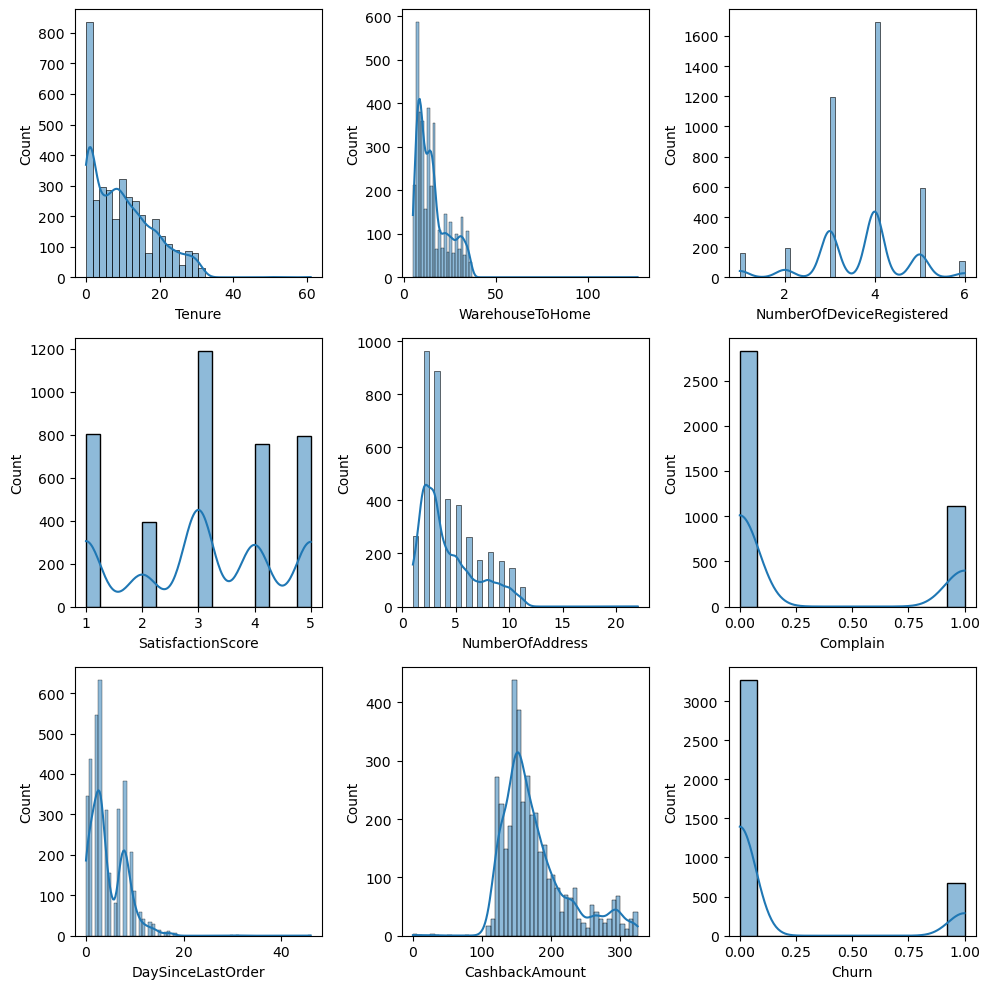

In [13]:
fig = plt.figure(figsize=(10,10)) # (horizontal, vertikal)
posisi = 1

for kolom in numeric.columns:
  plt.subplot(3,3,posisi) # (berapa baris, berapa kolom, di urutan ke berapa)
  sns.histplot(numeric[kolom], kde = True) # kernell density estimator
  fig.tight_layout()

  posisi += 1

plt.show()

Feature bernilai Diskrit :
- SatisfactionScore
- Complain
- Churn

Feature bernilai Continu :
- Tenure
- WarehouseToHome
- NumberOfDeviceRegistered
- NumberOfAddress
- DaySinceLastOrder
- CashbackAmount

Berdasarkan histogram diatas, semua feature numeric berdistribusi tidak normal. 

## Outliers

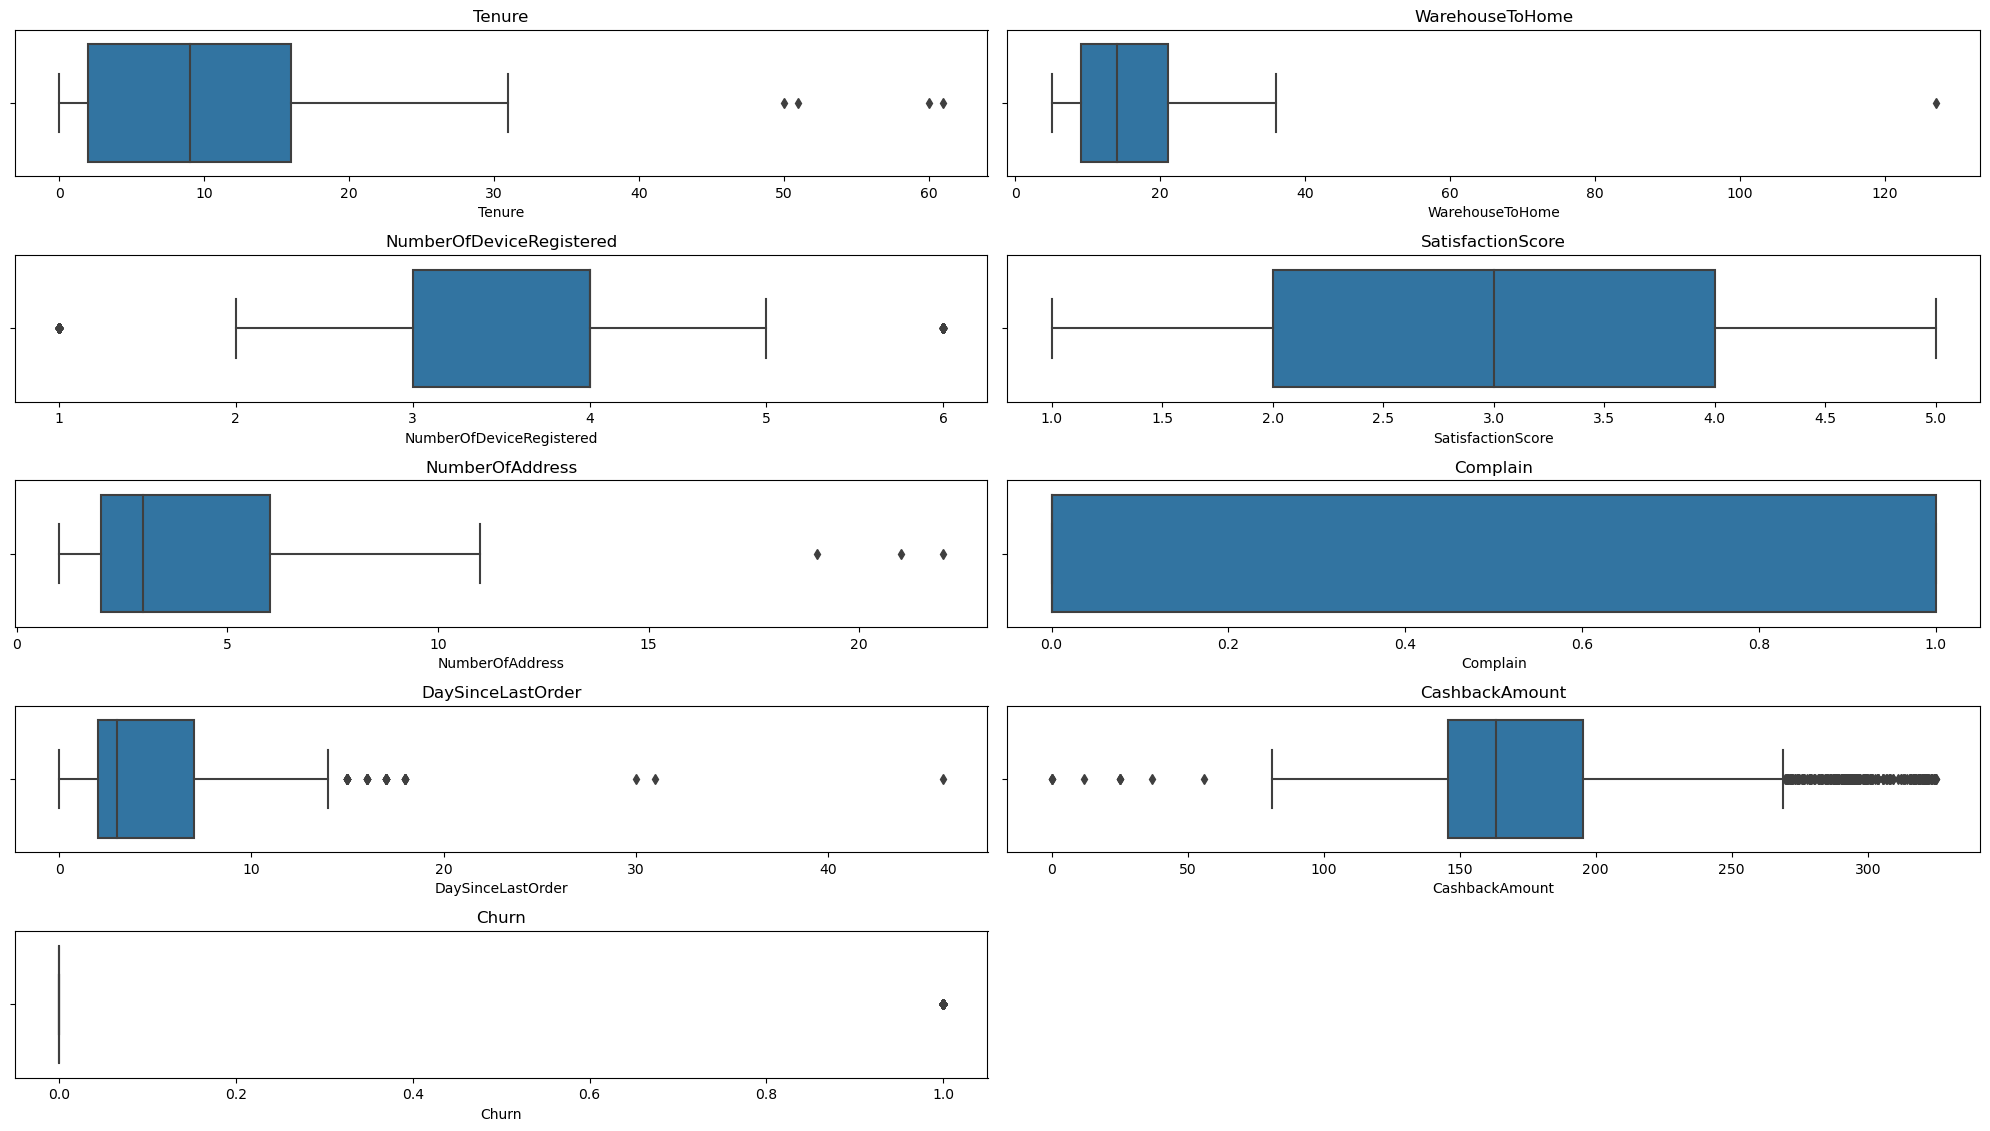

In [14]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numeric.columns:
    count += 1
    plt.subplot(9,2,count)
    sns.boxplot(numeric, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [15]:
def check_outliers(df, kolom):
  for kolom in numeric.columns:
      q1 = df[kolom].describe().loc['25%']
      q3 = df[kolom].describe().loc['75%']
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

      jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
      print(f"data {kolom} memiliki outliers {jumlah_outliers}")

check_outliers(df, numeric.columns)

data Tenure memiliki outliers 4
data WarehouseToHome memiliki outliers 1
data NumberOfDeviceRegistered memiliki outliers 271
data SatisfactionScore memiliki outliers 0
data NumberOfAddress memiliki outliers 3
data Complain memiliki outliers 0
data DaySinceLastOrder memiliki outliers 43
data CashbackAmount memiliki outliers 316
data Churn memiliki outliers 674


Dilihat beberapa feature yang memiliki outliers masih relevan dengan data lainnya.

## Normal Test

In [16]:
lisPvalue = []
lisNormalitas = []
listKolom = numeric.columns
for i in listKolom :
    stat,pvalue=normaltest(df[i])
    if pvalue > 0.05:
        status = 'Terdistribusi normal' #fail to reject Ho
    else: 
        status = 'Tidak terdistribusi normal' # reject Ho
    lisPvalue.append(pvalue)
    lisNormalitas.append(status)

dfNormalitas = pd.DataFrame({
    'Kolom' : listKolom,
    'pvalue' : lisPvalue,
    'Status_Normalitas' : lisNormalitas
})
dfNormalitas

,Kolom,pvalue,Status_Normalitas
0,Tenure,NaN,Tidak terdistribusi normal
1,WarehouseToHome,NaN,Tidak terdistribusi normal
2,NumberOfDeviceRegistered,9.160680e-32,Tidak terdistribusi normal
3,SatisfactionScore,0.000000e+00,Tidak terdistribusi normal
4,NumberOfAddress,2.262399e-131,Tidak terdistribusi normal
5,Complain,0.000000e+00,Tidak terdistribusi normal
6,DaySinceLastOrder,NaN,Tidak terdistribusi normal
7,CashbackAmount,1.640068e-142,Tidak terdistribusi normal
8,Churn,1.909653e-235,Tidak terdistribusi normal


## Correlation

In [17]:
numeric.corr(method='spearman')

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,-0.053618,-0.017633,-0.048987,0.277656,-0.041638,0.198661,0.431859,-0.420157
WarehouseToHome,-0.053618,1.000000,0.026200,0.023106,0.023512,0.039878,0.025546,0.023663,0.074552
NumberOfDeviceRegistered,-0.017633,0.026200,1.000000,0.000564,0.124153,0.013035,0.035833,0.203806,0.103913
SatisfactionScore,-0.048987,0.023106,0.000564,1.000000,0.041714,-0.033045,0.019757,-0.009212,0.106293
NumberOfAddress,0.277656,0.023512,0.124153,0.041714,1.000000,0.008248,-0.070876,0.259277,0.025071
Complain,-0.041638,0.039878,0.013035,-0.033045,0.008248,1.000000,-0.048045,0.018085,0.261450
DaySinceLastOrder,0.198661,0.025546,0.035833,0.019757,-0.070876,-0.048045,1.000000,0.375708,-0.188466
CashbackAmount,0.431859,0.023663,0.203806,-0.009212,0.259277,0.018085,0.375708,1.000000,-0.182730
Churn,-0.420157,0.074552,0.103913,0.106293,0.025071,0.261450,-0.188466,-0.182730,1.000000


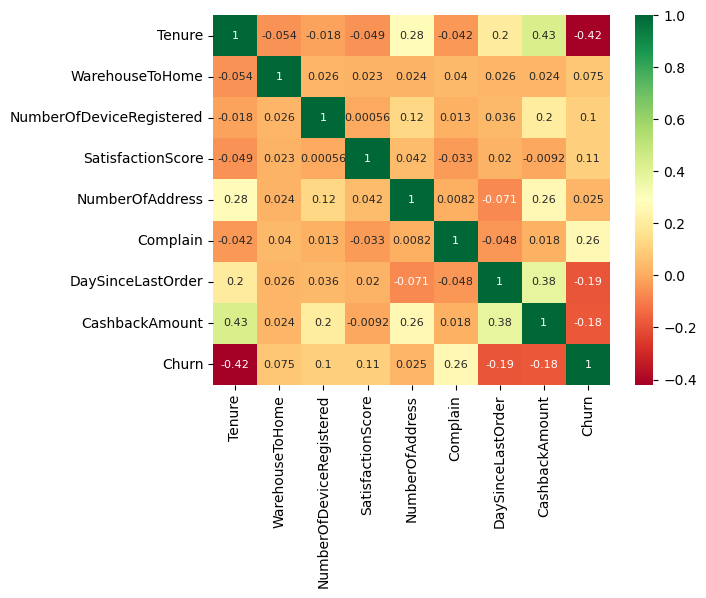

<Figure size 2000x2000 with 0 Axes>

In [18]:
heatmap = sns.heatmap(numeric.corr(method='spearman'), cmap="RdYlGn", annot=True, annot_kws={"fontsize": 8})
plt.figure(figsize=(20, 20))
plt.tight_layout()
plt.show()

## Categoric

In [19]:
categoric = df.select_dtypes(exclude='number')
categoric

,PreferedOrderCat,MaritalStatus
0,Laptop & Accessory,Single
1,Mobile,Married
2,Laptop & Accessory,Married
3,Fashion,Divorced
4,Others,Single
...,...,...
3936,Fashion,Married
3937,Mobile Phone,Single
3938,Laptop & Accessory,Married
3939,Mobile,Married


In [20]:
df.describe(include = 'object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


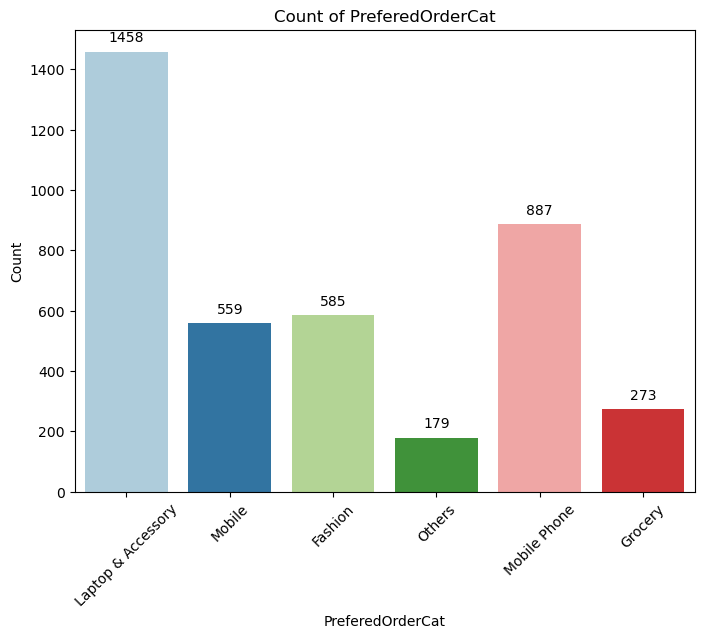

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='PreferedOrderCat', palette='Paired')
plt.title('Count of PreferedOrderCat')
plt.xlabel('PreferedOrderCat')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()


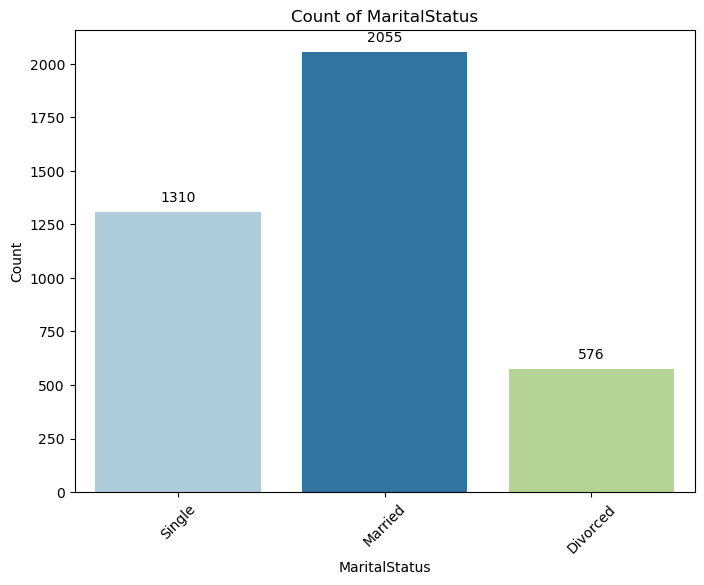

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='MaritalStatus', palette='Paired')
plt.title('Count of MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()


- Feature **PreferedOrderCat** terdapat **6** unique values dan value **Laptop & Accessory** memiliki freq tertinggi sebesar **1458**
- Feature **MaritalStatus** terdapat **3** unique values dan value **Married** memiliki freq tertinggi sebesar **2055**

# Data Cleaning

In [23]:
df_prep = df.copy()
len(df_prep)

3941

## Handling Missing Values

Handling missing values akan diisi dengan nilai median , dikarenakan data berdistribusi tidak normal.
serta Handling missing values akan diisi dengan nilai median atau cara simple, tanpa menggunakan KNNImputer atau ML karena percentage data missing values masih relatih kecil, hanya sebesar 5%.


In [24]:
dfDesc

,dataFeatures,dataType,null,null%,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[17.0, 10.0]"
1,WarehouseToHome,float64,169,4.29,33,"[25.0, 6.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[6, 4]"
3,PreferedOrderCat,object,0,0.00,6,"[Others, Laptop & Accessory]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[1, 7]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[15.0, 10.0]"
9,CashbackAmount,float64,0,0.00,2335,"[151.3, 126.22]"


### 1. Mengisi missing values`Tenure`

In [25]:
df_prep[df_prep['Tenure'].isna()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
16,NaN,21.0,5,Mobile,1,Married,1,1,3.0,121.68,0
37,NaN,6.0,4,Mobile,5,Married,2,0,2.0,122.18,0
44,NaN,7.0,4,Mobile,3,Married,2,0,0.0,120.08,0
85,NaN,6.0,3,Mobile,1,Married,4,0,2.0,122.70,0
93,NaN,15.0,3,Mobile,1,Married,4,0,3.0,120.75,0
...,...,...,...,...,...,...,...,...,...,...,...
3842,NaN,26.0,3,Mobile,3,Married,5,0,0.0,122.59,0
3853,NaN,28.0,3,Mobile Phone,3,Single,2,1,0.0,116.75,1
3879,NaN,16.0,3,Mobile,4,Married,2,0,2.0,122.97,0
3890,NaN,9.0,3,Mobile Phone,3,Single,2,0,0.0,114.20,1


In [26]:
medianTenure = df_prep['Tenure'].median()
print(f'Median Tenure : {medianTenure}')

Median Tenure : 9.0


In [27]:
df_prep['Tenure'].fillna(medianTenure, inplace=True)

### 2. Mengisi missing values`WarehouseToHome`

In [28]:
df_prep[df_prep['WarehouseToHome'].isna()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1
33,0.0,NaN,4,Mobile,4,Divorced,6,0,1.0,125.46,1
34,0.0,NaN,4,Mobile,1,Married,6,0,3.0,123.67,1
35,0.0,NaN,3,Mobile,5,Married,4,0,0.0,123.22,0
57,0.0,NaN,4,Mobile,4,Married,2,0,3.0,123.68,0
...,...,...,...,...,...,...,...,...,...,...,...
3871,7.0,NaN,1,Mobile,3,Married,1,0,0.0,125.85,0
3898,0.0,NaN,3,Mobile,3,Married,2,0,2.0,126.10,1
3900,0.0,NaN,4,Mobile,1,Single,2,1,0.0,124.39,1
3907,2.0,NaN,3,Mobile,5,Divorced,8,1,2.0,124.04,1


In [29]:
medianWarehouseToHome = df_prep['WarehouseToHome'].median()
print(f'Median WarehouseToHome : {medianWarehouseToHome}')

Median WarehouseToHome : 14.0


In [30]:
df_prep['WarehouseToHome'].fillna(medianWarehouseToHome, inplace=True)

### 3. Mengisi missing values`DaySinceLastOrder`

In [31]:
df_prep[df_prep['DaySinceLastOrder'].isna()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
29,1.0,17.0,5,Fashion,5,Married,11,0,NaN,228.06,1
52,16.0,9.0,4,Fashion,1,Married,4,1,NaN,226.24,0
...,...,...,...,...,...,...,...,...,...,...,...
3836,28.0,8.0,4,Fashion,3,Married,9,0,NaN,230.02,0
3843,13.0,7.0,2,Fashion,1,Married,2,0,NaN,221.13,0
3892,20.0,7.0,4,Fashion,5,Married,9,0,NaN,218.96,0
3894,9.0,24.0,4,Laptop & Accessory,5,Divorced,5,1,NaN,214.66,0


In [32]:
medianDaySinceLastOrder = df_prep['DaySinceLastOrder'].median()
print(f'Median DaySinceLastOrder : {medianDaySinceLastOrder}')

Median DaySinceLastOrder : 3.0


In [33]:
df_prep['DaySinceLastOrder'].fillna(medianDaySinceLastOrder, inplace=True)

In [34]:
total_data = len(df_prep)
missing = df_prep.isna().sum().sort_values(ascending=False)
percentage = missing / total_data * 100
pd.DataFrame({'Total':missing, 'Percentage':percentage})

,Total,Percentage
Tenure,0,0.0
WarehouseToHome,0,0.0
NumberOfDeviceRegistered,0,0.0
PreferedOrderCat,0,0.0
SatisfactionScore,0,0.0
MaritalStatus,0,0.0
NumberOfAddress,0,0.0
Complain,0,0.0
DaySinceLastOrder,0,0.0
CashbackAmount,0,0.0


## Handling Duplicate Data

Handling duplicate data pada case ini yaitu menghapus data duplicate, karena agar data tidak bias dan diasumsikan data duplicate ini bersumber dari CustomerID yang sama.

In [35]:
print(f'Total number of duplicate rows: {duplicate_total} atau {duplicate_percentage}%')

Total number of duplicate rows: 671 atau 17.026135498604415%


In [36]:
df_prep = df_prep.drop_duplicates()

In [37]:
len(df_prep)

3269

In [38]:
df_prep.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.00000,3269.000000
mean,10.127868,15.447537,3.676354,3.020496,4.223004,0.281738,4.460385,177.40115,0.163353
std,8.438172,8.396214,1.017530,1.395221,2.623593,0.449915,3.610052,49.30914,0.369744
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.89000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.88000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.13000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.99000,1.000000


Representasi data numeric masih relevan (kualitas baik)

## Handling Inconsisten Data

Pada feature **PreferedOrderCat** terdapat nilai **Mobile Phone** dan **Mobile**. Terdapat ketidak konsistenan data. Maka nilai **Mobile** akan di ubah menjadi **Mobile Phone**.

In [39]:
df_prep['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone           725
Fashion                484
Mobile                 458
Grocery                240
Others                 149
Name: count, dtype: int64

In [40]:
df_prep['PreferedOrderCat'] = df_prep['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [41]:
df_prep['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                240
Others                 149
Name: count, dtype: int64

In [42]:
df.describe(include = 'object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [43]:
df_prep.describe(include = 'object')

,PreferedOrderCat,MaritalStatus
count,3269,3269
unique,5,3
top,Laptop & Accessory,Married
freq,1213,1686


Setelah handling inconsisten data. Dicek kembali describe object untuk mengecek apakah ada perubahan signifikan pada feature categoric. Dan hasilnya tidak ada perubahan signifikan pada describe object.

## Handling Outliers

Outliers tidak akan dihapus karena outliers masih masuk akal.

In [44]:
def remove_outliers(df_prep, kolom):
    for kol in kolom:
        q1 = df_prep[kol].describe().loc['25%']
        q3 = df_prep[kol].describe().loc['75%']
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_prep = df_prep[(df_prep[kol] >= lower_bound) & (df_prep[kol] <= upper_bound)]
    return df_prep

In [45]:
numeric_prep = df_prep.select_dtypes(include='number')
numeric_prep.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

In [46]:
for kolom in numeric_prep.columns:
      q1 = df_prep[kolom].describe().loc['25%']
      q3 = df_prep[kolom].describe().loc['75%']
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

      jumlah_outliers = df_prep[(df_prep[kolom] < lower_bound) | (df_prep[kolom] > upper_bound)].shape[0]
      print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data Tenure memiliki outliers 4
data WarehouseToHome memiliki outliers 1
data NumberOfDeviceRegistered memiliki outliers 226
data SatisfactionScore memiliki outliers 0
data NumberOfAddress memiliki outliers 3
data Complain memiliki outliers 0
data DaySinceLastOrder memiliki outliers 40
data CashbackAmount memiliki outliers 253
data Churn memiliki outliers 534


# Data Clean (Export Data)

In [47]:
# For Google Collab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# path = '/content/drive/MyDrive/Dataset/'
# df_prep.to_csv(path+'customer_clean.csv', index=None)

In [48]:
# For Local Drive
df_prep.to_csv('customer_clean_new.csv', index=False)

# Exploratory Data Analysis

In [49]:
# For Local Drive
df2 = pd.read_csv('customer_clean_new.csv')

In [50]:
print({df2.shape})
total_data = len(df2)
churn_data = df2['Churn'].value_counts()
percentage = churn_data / total_data * 100
pd.DataFrame({'Count':churn_data, 'Percentage':percentage})

{(3269, 11)}


,Count,Percentage
Churn,,
0,2735,83.664729
1,534,16.335271


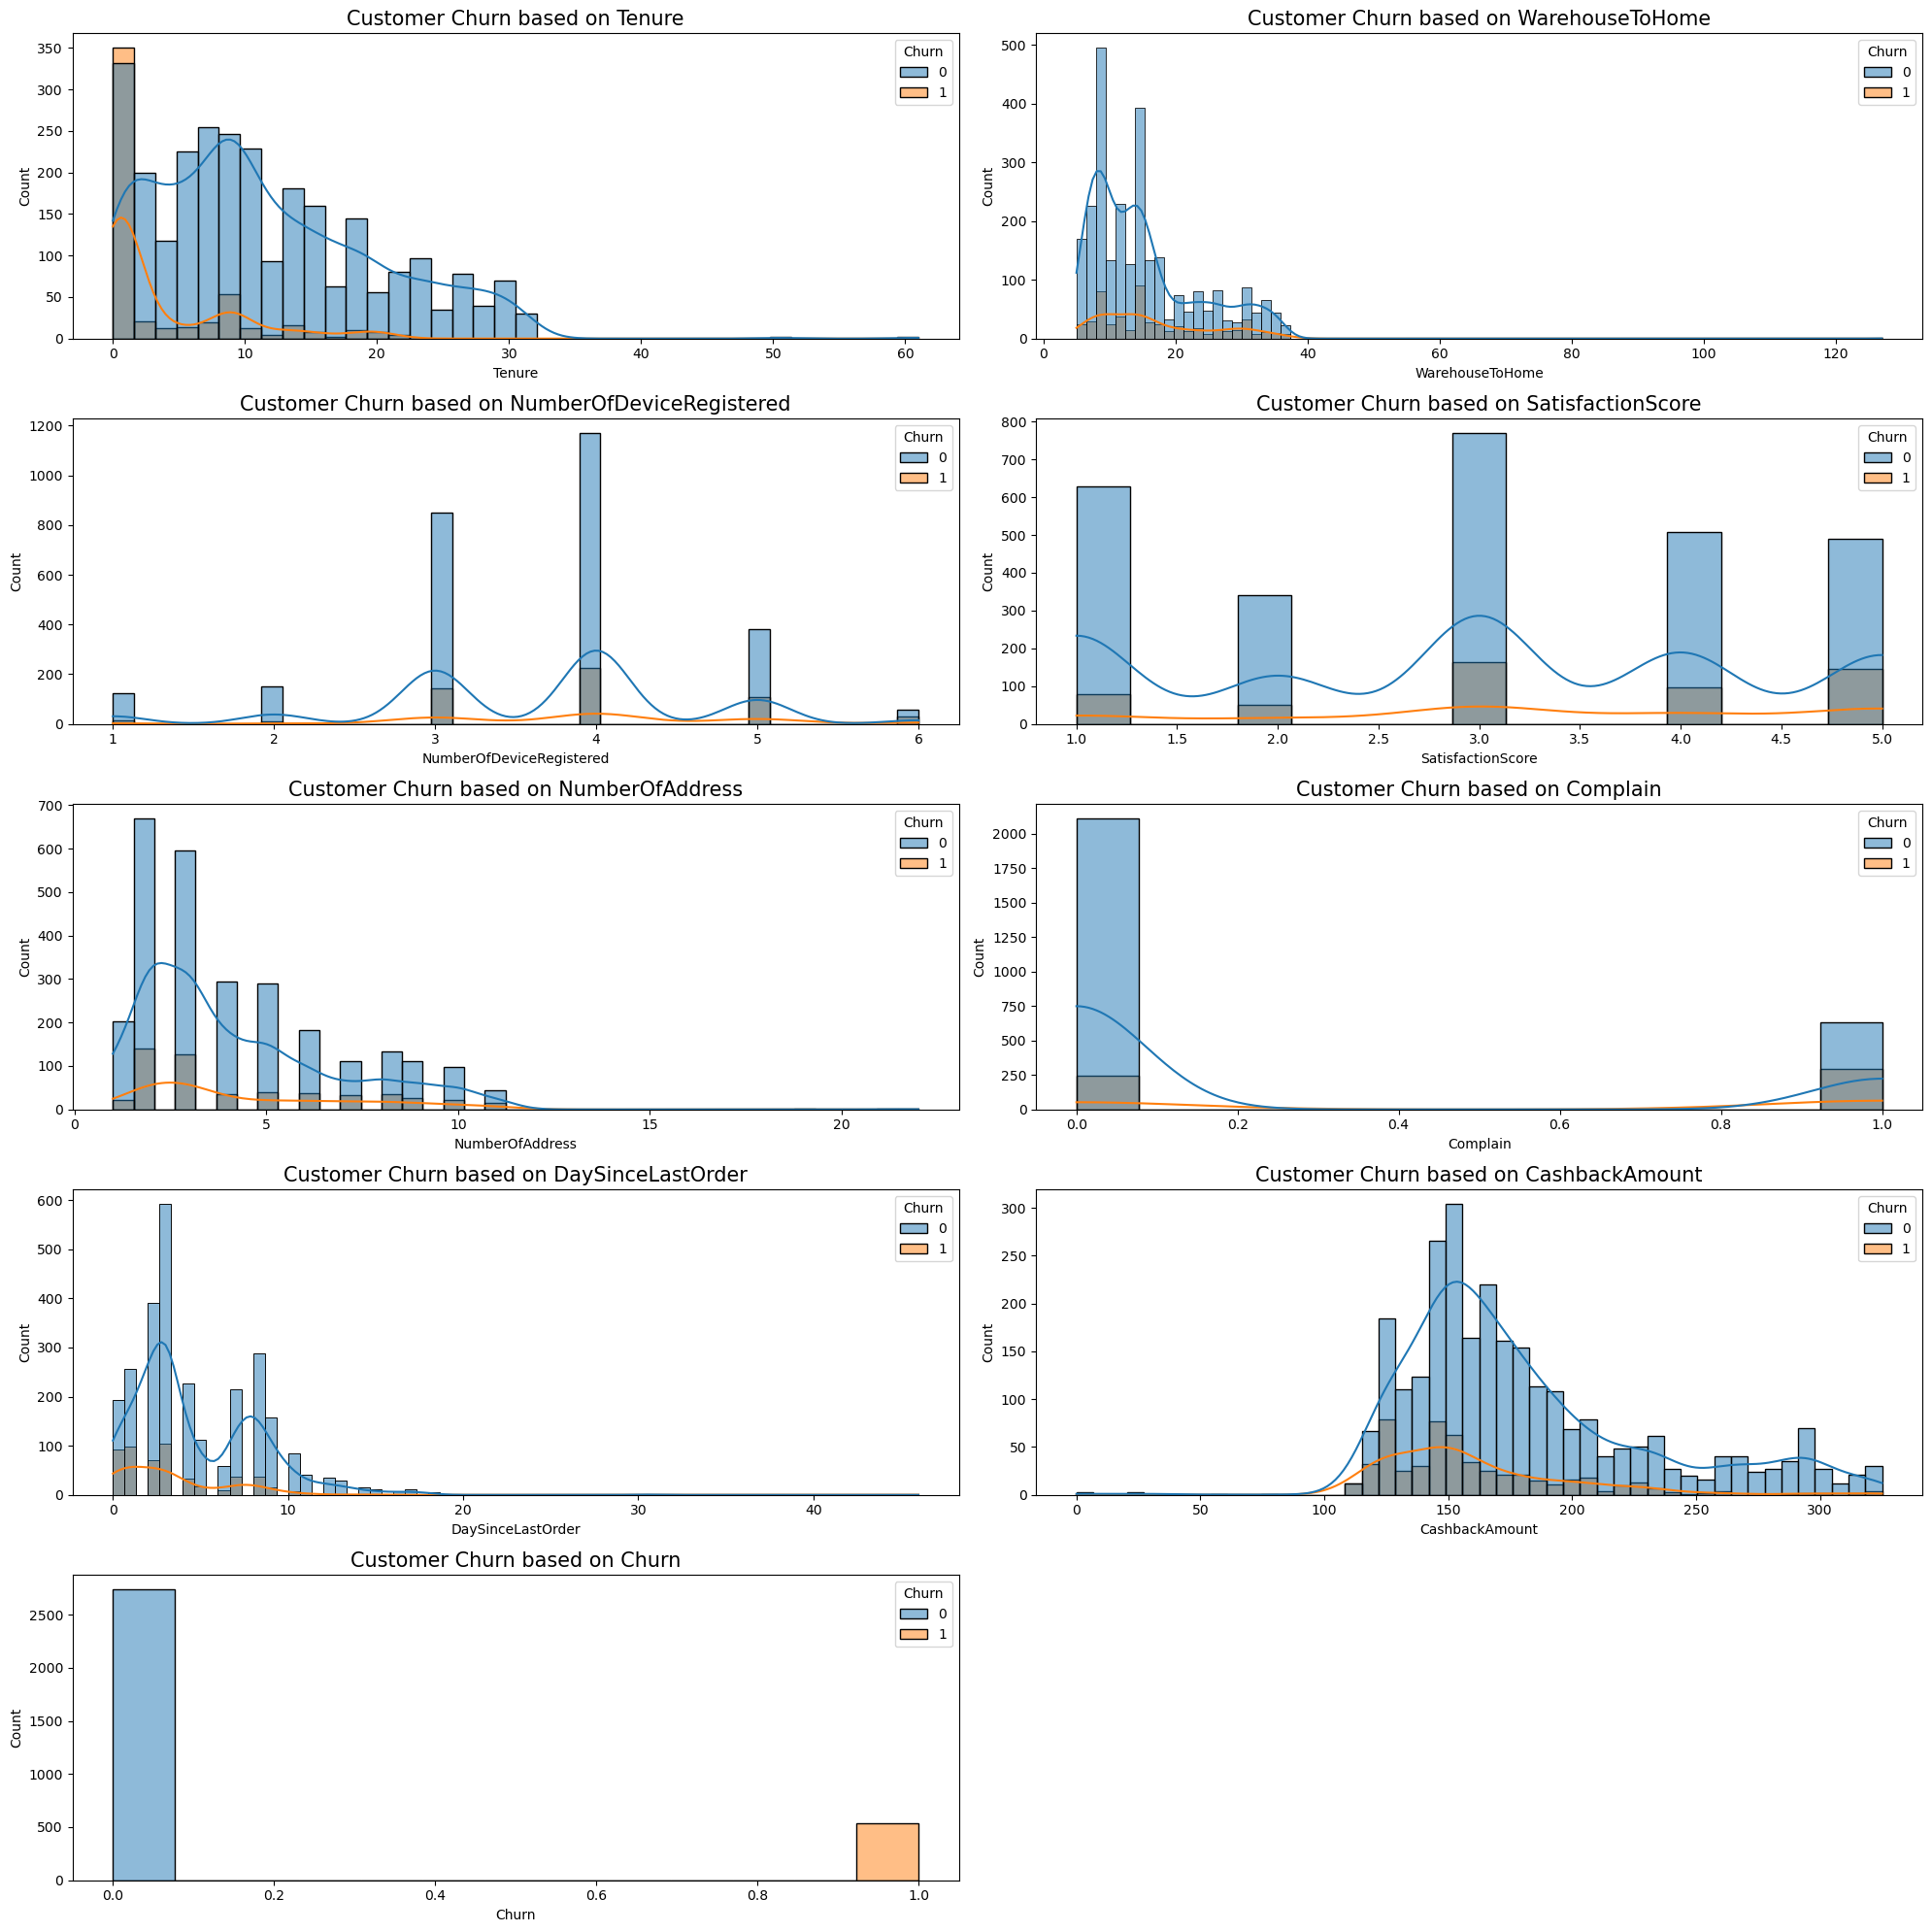

In [51]:
# Plotting
numeric_clean = df2.select_dtypes(include='number')

plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_clean.columns, 1):
    plt.subplot(5, 2, i)  # Adjusting to have a 2x3 grid for subplots
    sns.histplot(data=df2, x=col, hue='Churn', kde=True)
    plt.title(f'Customer Churn based on {col}', fontsize=15)

plt.tight_layout()
plt.show()

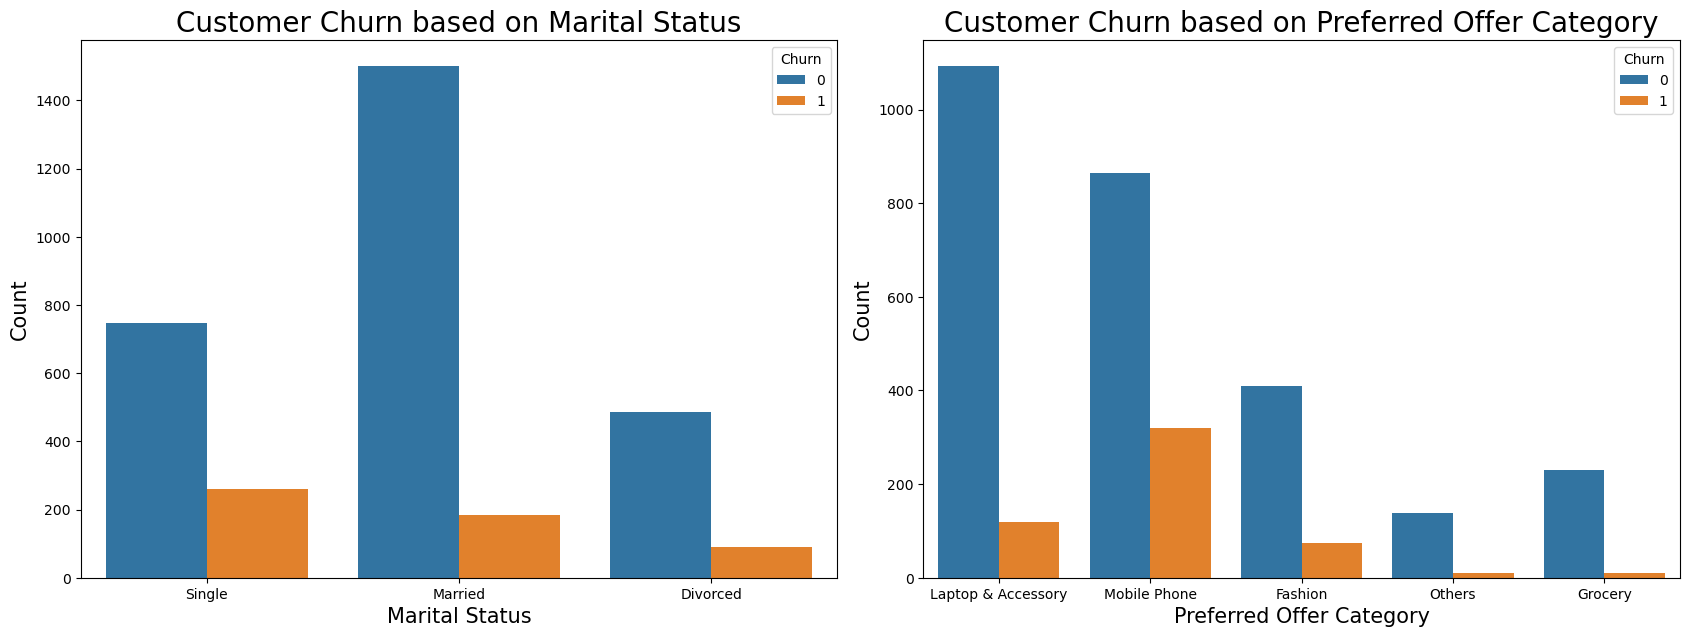

In [52]:
plt.figure(figsize=(17, 12))

# Plot for Marital Status
plt.subplot(221)
sns.countplot(data=df2, x='MaritalStatus', hue='Churn')
plt.title('Customer Churn based on Marital Status', fontsize=20)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Plot for Preferred Offer Category
plt.subplot(222)
sns.countplot(data=df2, x='PreferedOrderCat', hue='Churn')
plt.title('Customer Churn based on Preferred Offer Category', fontsize=20)
plt.xlabel('Preferred Offer Category', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.tight_layout()
plt.show()

# Data Preprocessing & Feature Engineering

In [53]:
df2.shape

(3269, 11)

In [54]:
df2['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Fashion', 'Others',
       'Grocery'], dtype=object)

In [55]:
category = df2.select_dtypes(exclude='number')
category = category.columns
category

Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object')

In [56]:
# Melihat value count variable categorical
for col in category:
    percent = round(df2[col].value_counts()*100/len(df2[col]),2)
    print(f'''Value count column {col}:''')
    print(df2[col].value_counts())
    print('')
    print('Percentage :\n',percent)
    print('---'*10)
    print()

Value count column PreferedOrderCat:
PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                240
Others                 149
Name: count, dtype: int64

Percentage :
 PreferedOrderCat
Laptop & Accessory    37.11
Mobile Phone          36.19
Fashion               14.81
Grocery                7.34
Others                 4.56
Name: count, dtype: float64
------------------------------

Value count column MaritalStatus:
MaritalStatus
Married     1686
Single      1007
Divorced     576
Name: count, dtype: int64

Percentage :
 MaritalStatus
Married     51.58
Single      30.80
Divorced    17.62
Name: count, dtype: float64
------------------------------



## Column Transformer

- Feature **PreferedOrderCat** dan **MaritalStatus** ditransform menggunakan **One Hot Encoding**
- Feature **Tenure**, **WarehouseToHome**, **NumberOfDeviceRegistered**, **SatisfactionScore**, **NumberOfAddress**, **Complain**, **DaySinceLastOrder**, **CashbackAmount** ditransform menggunakan **Robust Scaler** karena data yang digunakan mengandung banyak outliers dan berdistribusi tidak normal.

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
       ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
       ('scaler', RobustScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'])
    ],
    remainder='passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('scaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'DaySinceLastOrder',
                                  'CashbackAmount'])])

|No| Attribute               | Data Type | Encoder |Scaler     |
|--|-------------------------|-----------|---------|-----------|
|1 |Tenure                   |float	     |         |Robust     |
|2 |WarehouseToHome          |float      |         |Robust     |
|3 |NumberOfDeviceRegistered |int	     |         |Robust     |
|4 |PreferedOrderCat         |str	     |One Hot  |           |
|5 |SatisfactionScore 	     |int	     |         |Robust     |
|6 |MaritalStatus	         |str	     |One Hot  |           |
|7 |NumberOfAddress	         |int	     |         |Robust     |
|8 |Complain	             |int	     |         |Robust     |
|9 |DaySinceLastOrder 	     |float	     |         |Robust     |
|10|CashbackAmount 	         |float	     |         |Robust     |

## Split Data

Pembagian data train dan data test yaitu 80 : 20
karena salah satu praktik umum dalam machine learning

In [58]:
X = df2.drop(columns='Churn') # Feature
y = df2['Churn'] # Target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 100)

In [59]:
print('Result split data : ')
print(f'X = {X.shape}')
print(f'y = {y.shape}')
print(f'X_train = {X_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

Result split data : 
X = (3269, 10)
y = (3269,)
X_train = (2615, 10)
X_test = (654, 10)
y_train = (2615,)
y_test = (654,)


## Check Imbalance & Resampling Benchmarking

In [60]:
y_train.shape

(2615,)

In [61]:
value_counts = pd.Series(y_train).value_counts()
percentage = value_counts / len(y_train) * 100
result_df = pd.concat([value_counts, percentage], axis=1)
result_df.columns = ['Value Counts', 'Percentage']
print(result_df)

       Value Counts  Percentage
Churn                          
0              2188   83.671128
1               427   16.328872


In [62]:
fig = px.histogram(y_train, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

In [63]:
resampling_methods = {
    'RandomUnderSampler': RandomUnderSampler(random_state=1000),
    'RandomOverSampler': RandomOverSampler(random_state=1000),
    'SMOTE': SMOTE(random_state=1000),
    'NearMiss': NearMiss(),
}

results = {}

for name, method in resampling_methods.items():
    pipeline = ImbPipeline([
        ('preprocessing', preprocessor),
        ('Resampling', method),
        ('RandomForest', RandomForestClassifier())
    ])
    
    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)

    f1 = f1_score(y_test, pred, average='binary', pos_label=1)  
    results[name] = f1

for resampling_method, f1 in results.items():
    print(f'{resampling_method}: {f1:.4f}')

RandomUnderSampler: 0.6345
RandomOverSampler: 0.7415
SMOTE: 0.6791
NearMiss: 0.3818


Berdasarkan plot diatas feature CHurn (Target) ternyata imbalance, setelah dilakukan resampling benchmarking metode RandomOverSampler memiliki score tertinggi sebesar 0.7415. Maka pada case ini resampling menggunakan RandomOverSampler.

# Benchmark Modeling

Akan dilakukan benchmark modelling dengan metode sebagai berikut :
- Random Forest
- Gradient Boost
- Support Vector Classifier (SVC)
- K-Nearest Neighbors (KNN)
- Logistic Regression

Model - model tersebut dipilih karena cocok untuk data yang memiliki banyak outliers dan jumlah data relatif sedikit.

In [64]:
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
svm = SVC(kernel='rbf')
knn = KNeighborsClassifier()
logreg = LogisticRegression(penalty='l2')

models = [rf, gboost, svm, knn, logreg]
model_names = ['Random Forest', 'GBoost', 'SVM', 'KNN','Logistic Regression']
f1_scores_list = []
stds = []
f1_scores_test_list = []

kfold = KFold(n_splits=5, shuffle=True, random_state=2000)

for model in models:
    model_pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                        ('randomover', RandomOverSampler(random_state=2000)),
                                        ('classifier', model)])
    
    # Perform cross-validation on the training set
    cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=kfold, scoring='f1')
    f1_scores_list.append(cv_scores.mean())
    stds.append(cv_scores.std())
    
    # Train on the entire training set and evaluate on the test set
    model_pipeline.fit(X_train, y_train)
    y_pred_test = model_pipeline.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test)
    f1_scores_test_list.append(f1_test)
df_benchmark = pd.DataFrame({
    'Model': model_names,
    'Mean F1 Score (Train)': f1_scores_list,
    'STD (Train)': stds,
    'Mean F1 Score (Test)': f1_scores_test_list
})

df_benchmark = df_benchmark.sort_values('Mean F1 Score (Train)', ascending=False)
df_benchmark

,Model,Mean F1 Score (Train),STD (Train),Mean F1 Score (Test)
0,Random Forest,0.719871,0.019393,0.758294
1,GBoost,0.662947,0.014074,0.689394
2,SVM,0.618487,0.014491,0.654545
4,Logistic Regression,0.568795,0.009256,0.544892
3,KNN,0.553871,0.018476,0.550523


- Di dapat 2 Model terbaik yaitu Random Forest dengan Mean F1 Score (Train) sebesar 0.719871 dan GBoost dengan Mean F1 Score (Train) sebesar 0.662947.  

# Hyperparameter Tuning

In [65]:
# Random Forest
rdf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('randomover', RandomOverSampler(random_state=2000)),
    ('rdf', RandomForestClassifier(random_state=2000))
])

param_grid = {
    'rdf__n_estimators': [100, 200],
    'rdf__max_depth': [10, 20],
    'rdf__min_samples_split': [2, 5],
    'rdf__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rdf_pipeline, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated F1 score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'rdf__max_depth': 20, 'rdf__min_samples_leaf': 2, 'rdf__min_samples_split': 5, 'rdf__n_estimators': 200}
Best cross-validated F1 score: 0.7319782857060783


In [66]:
gboost_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('randomover', RandomOverSampler(random_state=2000)),
    ('gboost', GradientBoostingClassifier(random_state=2000))
])

# Define the parameter grid for LightGBM
param_grid = {
    'gboost__n_estimators': [50, 100],
    'gboost__learning_rate': [0.01, 0.05],
    'gboost__max_depth': [3, 5], 
    'gboost__min_samples_split': [2, 5],
    'gboost__min_samples_leaf': [1, 2],
    'gboost__subsample': [0.6, 0.8],
    'gboost__max_features': ['sqrt', 'log2']
}
   
# Initialize GridSearchCV
grid_search = GridSearchCV(gboost_pipeline, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated F1 score:", grid_search.best_score_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters: {'gboost__learning_rate': 0.05, 'gboost__max_depth': 5, 'gboost__max_features': 'sqrt', 'gboost__min_samples_leaf': 1, 'gboost__min_samples_split': 5, 'gboost__n_estimators': 100, 'gboost__subsample': 0.6}
Best cross-validated F1 score: 0.6863124653615971


Result hyperparameter tuning :

<br>**Random Forest**
- Best parameters: {'rdf__max_depth': 20, 'rdf__min_samples_leaf': 2, 'rdf__min_samples_split': 5, 'rdf__n_estimators': 200}
- Best cross-validated F1 score: 0.7319782857060783

<br>**Gradient Boost**
- Best parameters: {'gboost__learning_rate': 0.05, 'gboost__max_depth': 5, 'gboost__max_features': 'sqrt', 'gboost__min_samples_leaf': 1, 'gboost__min_samples_split': 5, 'gboost__n_estimators': 100, 'gboost__subsample': 0.6}
- Best cross-validated F1 score: 0.6863124653615971

Setelah dilakukan hyperparameter tuning. Didapat performa yang baik yaitu Random Forest dengan Best parameters: {'rdf__max_depth': 20, 'rdf__min_samples_leaf': 2, 'rdf__min_samples_split': 5, 'rdf__n_estimators': 200}
dan Best cross-validated F1 score: 0.7319782857060783.
Maka pada case ini Machine Learning akan dideploy menggunakan model RandomForest

Random Forest adalah salah satu metode ensemble learning yang menggunakan banyak pohon keputusan (decision trees) untuk melakukan klasifikasi atau regresi. Cara Kerja Random Forest :
1. Pembuatan Banyak Pohon Keputusan: Random Forest membangun banyak pohon keputusan (biasanya ratusan atau ribuan) dari subset data pelatihan yang berbeda. Setiap pohon dibangun menggunakan sampel acak dari data pelatihan dengan penggantian (bootstrap sampling).
2. Random Feature Selection: Untuk setiap split di setiap pohon, hanya subset acak dari fitur yang dipertimbangkan. Ini membantu mengurangi korelasi antara pohon-pohon dan meningkatkan keragaman model.
3. Voting atau Averaging: Untuk klasifikasi, hasil akhir diputuskan berdasarkan voting mayoritas dari semua pohon. Untuk regresi, hasil akhir adalah rata-rata dari semua prediksi pohon.

Random Forest efektif dalam menghadapi dataset dengan banyak outlier dan jumlah data yang kecil karena:
- Menggunakan banyak pohon untuk mengurangi overfitting.
- Robust terhadap outlier karena teknik bagging dan random feature selection.
- Optimalisasi parameter melalui cross-validation untuk mendapatkan performa terbaik dalam hal F1 score.

Dengan pendekatan ini, Random Forest dapat menjadi model yang kuat dan stabil meskipun bekerja dengan data yang kecil.

# Predict To Test Set (Final Model)

Final Model Test F1 Score: 0.6703
Final Model Test Accuracy: 0.9067
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       547
           1       0.79      0.58      0.67       107

    accuracy                           0.91       654
   macro avg       0.86      0.78      0.81       654
weighted avg       0.90      0.91      0.90       654



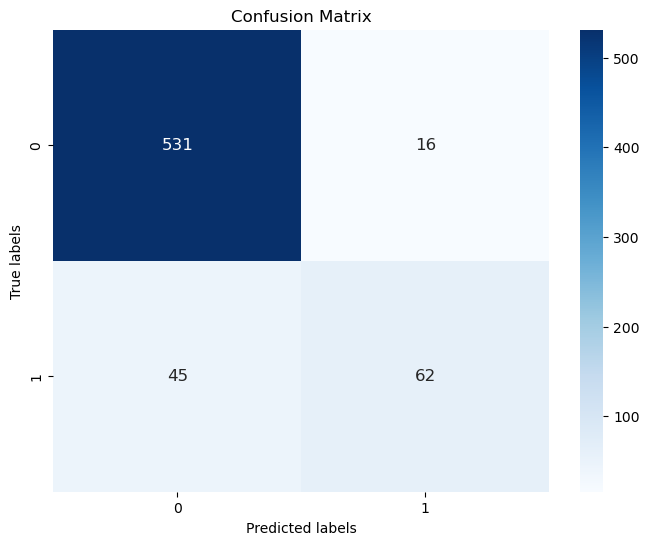

In [67]:
final_model = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42)

final_model.fit(preprocessor.transform(X_train), y_train)

ypred = final_model.predict(preprocessor.transform(X_test))

f1 = f1_score(y_test, ypred, average='binary', pos_label=1)  
accuracy = accuracy_score(y_test, ypred)
print(f"Final Model Test F1 Score: {f1:.4f}")
print(f"Final Model Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, ypred))

conf_matrix = confusion_matrix(y_test, ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Model klasifikasi churn menunjukkan kinerja yang sangat baik dalam memprediksi customer yang berpotensi churn. Dengan F1-Score 0.67 dan akurasi 90.67% serta dengan precision 79% dan recall 58%, model ini mampu mengidentifikasi customer yang tidak churn dengan sangat akurat, serta memprediksi customer yang churn dengan tingkat keberhasilan yang cukup tinggi. Dengan demikian, model ini dapat membantu perusahaan mengurangi risiko kehilangan customer dan meningkatkan loyalitas customer.

Hal ini dapat dilihat dari confusion matrix dimana model memprediksi 531 customer tidak churn dengan benar (TP), 16 customer tidak churn salah prediksi sebagai churn (FN), 45 customer churn salah prediksi sebagai tidak churn (FP), dan 62 customer churn diprediksi dengan benar (TN).

# Model Evaluation

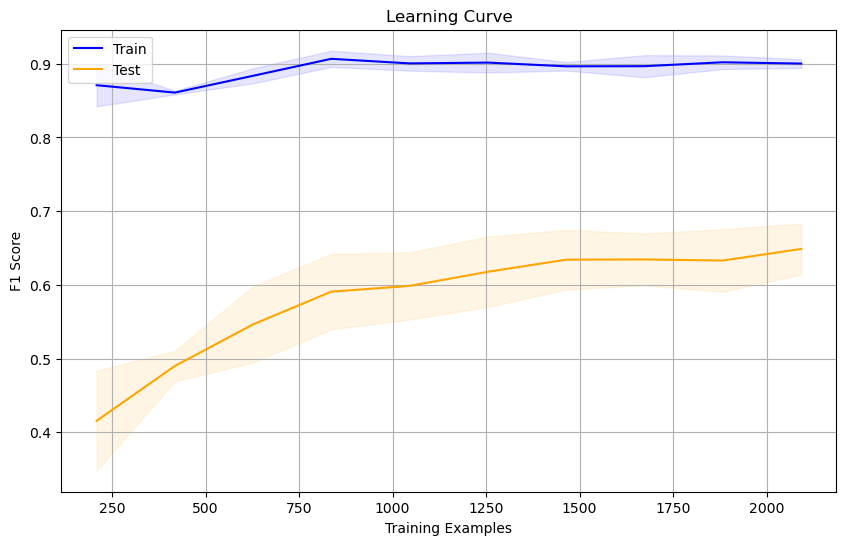

In [68]:
model = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42)

# Tentukan ukuran sampel data pelatihan yang akan digunakan dalam kurva pembelajaran
train_sizes, train_scores, test_scores = learning_curve(model, 
                                                        preprocessor.transform(X_train), y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        cv=5, 
                                                        scoring='f1', 
                                                        n_jobs=-1)

# Hitung rata-rata skor pada setiap ukuran sampel
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot kurva pembelajaran
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test', color='orange')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Berdasarkan gambar learning curve tersebut, model memiliki performa yang cukup baik dengan nilai F1 score yang semakin tinggi seiring dengan bertambahnya jumlah training examples. Terlihat juga bahwa nilai F1 score pada data training dan data test tidak terlalu jauh berbeda, hal ini menunjukkan bahwa model tidak mengalami overfitting.

# Feature Importance

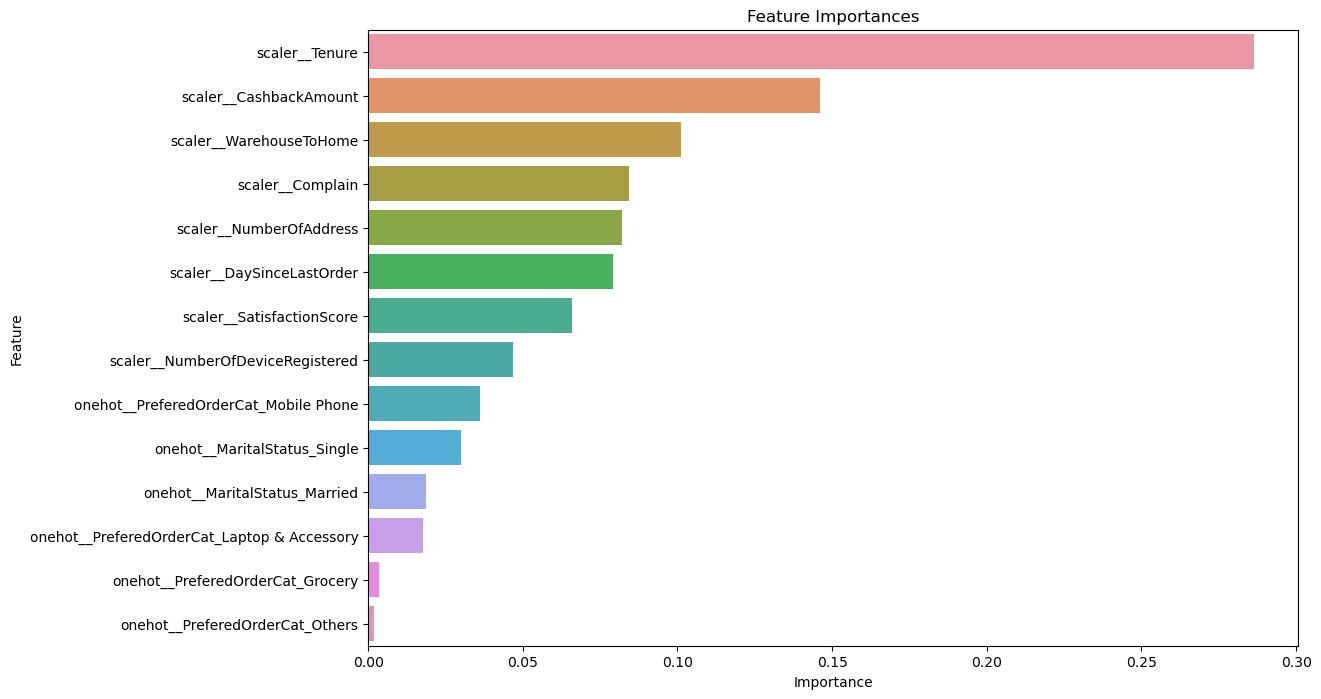

In [69]:
# Feature Importance
feature_importances = final_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

<br>- Tenure adalah fitur yang paling signifikan dalam mempengaruhi prediksi model. Menunjukkan bahwa ia dapat memiliki dampak besar baik positif maupun negatif pada prediksi.
<br>- CashbackAmount, Jumlah cashback memiliki dampak yang signifikan terhadap prediksi. Menunjukkan bahwa cashback yang lebih tinggi cenderung berkontribusi pada prediksi.
<br>- WarehouseToHome, Jarak atau waktu dari gudang ke rumah memiliki pengaruh moderat terhadap prediksi.
<br>- Complain memiliki pengaruh yang terhadap prediksi. Dapat dilihat bahwa adanya keluhan cenderung memberikan dampak pada prediksi customer churn.
<br>- NumberOfAddress, Jumlah alamat yang terdaftar juga merupakan fitur penting. Menunjukkan bahwa memiliki pengaruh besar baik positif maupun negatif.
<br>- DaySinceLastOrder, Hari sejak pesanan terakhir memiliki pengaruh yang cukup signifikan. Menunjukkan bahwa memiliki pengaruh besar baik positif maupun negatif.
<br>- SatisfactionScore, Skor kepuasan pelanggan memiliki dampak yang signifikan, di mana skor yang lebih tinggi cenderung memberikan dampak positif pada prediksi.
<br>- NumberOfDeviceRegistered, Jumlah perangkat yang terdaftar juga berpengaruh pada prediksi, dengan distribusi yang lebih lebar menunjukkan dampak yang cukup signifikan.
<br>- PreferedOrderCat_Mobile Phone, preferensi untuk memesan kategori mobile phone juga mempengaruhi prediksi model, tetapi dengan dampak yang lebih terfokus pada sisi negatif.
<br>- MaritalStatus_Single, juga mempengaruhi prediksi model, tetapi dengan dampak yang lebih terfokus pada sisi negatif.
<br>- MaritalStatus_Married, PreferedOrderCat_Laptop&Accessory, PreferedOrderCat_Grocery, PreferedOrderCat_Others memiliki pengaruh yang lebih kecil dibandingkan fitur-fitur lainnya.

# Conclusion & Recommendation

**Conclusion Model**
1. Model dapat melakukan prediksi customer churn, sehingga promosi dapat tepat sasaran.
   - Best model Random Forest dalam memprediksi customer churn
      |F1-Score|akurasi|precision|recall|
      |---------|-------|---------|-------|
      |0.67    |90.67% |79%      |58%   | 
2. Model dapat membantu meningkatkan customer retention rate.

**Recommendation Model**
1. Penambahan kolom seperti PreferredPaymentMode, HourSpendOnApp atau OrderCount agar dapat membantu mengurangi bias model dengan memasukkan informasi yang lebih lengkap dan akurat tentang data.
2. Menambahkan CustomerID untuk memastikan data dan sebagai pendukung langkah handling data duplicate.
3. Meningkatkan jumlah data agar hasil tidak mengarah ke overfitting.

**Conclusion Bisnis**
1. Model dapat melakukan prediksi terhadap customer yang terindikasi churn
   - Dilihat dari confusion matrix dimana model memprediksi 531 customer tidak churn dengan benar (TP), 16 customer tidak churn salah prediksi sebagai churn (FN), 45 customer churn salah prediksi sebagai tidak churn (FP), dan 62 customer churn diprediksi dengan benar (TN).
2. Terdapat 5 faktor yang mempengaruhi prediksi
<br>- Tenure adalah fitur yang paling signifikan dalam mempengaruhi prediksi model. Menunjukkan bahwa ia dapat memiliki dampak besar baik positif maupun negatif pada prediksi.
<br>- CashbackAmount, Jumlah cashback memiliki dampak yang signifikan terhadap prediksi. Menunjukkan bahwa cashback yang lebih tinggi cenderung berkontribusi pada prediksi.
<br>- WarehouseToHome, Jarak atau waktu dari gudang ke rumah memiliki pengaruh moderat terhadap prediksi.
<br>- Complain memiliki pengaruh yang terhadap prediksi. Dapat dilihat bahwa adanya keluhan cenderung memberikan dampak pada prediksi customer churn.
<br>- NumberOfAddress, Jumlah alamat yang terdaftar juga merupakan fitur penting. Menunjukkan bahwa memiliki pengaruh besar baik positif maupun negatif.

**Recommendation Bisnis**
1. Perusahaan membuat program loyalitas terhadap customer dengan tenure yang lama agar customer merasa dihargai oleh e-commerce.
2. Pemberian promo dalam bentuk cashback agar customer sering menggunakan e-commerce.
3. Meningkatkan proses penanganan complain dengan menyediakan fitur komunikasi yang mudah diakses atau perusahaan perlu mengevaluasi layanan terhadap penanganan complain agar jumlah complain berkurang dan mengurangi risiko churn.
4. Penyesuaian strategi promosi dengan memahami WarehouseToHome dan NumberOfAddress.

### Estimasi Keuntungan Bisnis

Berdasarkan hasil classification report dari model Random Forest model dapat memprediksi customer churn dengan akurasi 90.67% ,precision 79% dan recall 58%.

Biaya Promosi dengan Menggunakan Model
- Biaya promosi per customer = 20 USD
- Keuntungan yang diperoleh setiap kali customer yang dipromosikan no churn = 40 USD

1. Menghitung Biaya Promosi Berdasarkan Prediksi Model:
    - Biaya per promosi = 20 USD
    - Jumlah customer yang diprediksi churn = 107
    - Total biaya promosi = 107×20 USD = 2140 USD

2.	Menghitung Total Biaya Promosi Tanpa Model:
    - Jumlah total customer = 654
    - Biaya per promosi = 20 USD
    - Total biaya promosi = 654×20 USD = 13080 USD
    
Ringkasan Perbandingan Biaya Promosi
    - Dengan Model:
      <br>Total biaya promosi = 2140 USD
      <br>Promosi hanya diberikan kepada 107 customer yang diprediksi churn.
    - Tanpa Model:
      <br>Total biaya promosi = 13080 USD
      <br>Promosi diberikan kepada semua customer dengan total 654 customer tanpa mempertimbangkan kemungkinan churn.

Dengan menggunakan model, perusahaan dapat menghemat biaya promosi secara signifikan. Dalam contoh ini, penghematan yang diperoleh dengan menggunakan model adalah:
Penghematan = 13080 USD − 2140 USD = 10940 USD
Ini menunjukkan bahwa penggunaan model Random Forest tidak hanya efektif dalam memprediksi churn tetapi juga efisien dalam mengurangi biaya promosi yang dikeluarkan perusahaan.


# Save Model

In [71]:
import pickle

# Menyimpan model ke file
with open('final_model_rf.pkl', 'wb') as file:
    pickle.dump(final_model, file)

with open('transformer_rf.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

# Load Model

In [72]:
import pickle

# Memuat model dari file
with open('final_model_rf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


with open('transformer_rf.pkl', 'rb') as file_preprocessor:
    transformer_load = pickle.load(file_preprocessor)

In [73]:
df2[df2['Churn']==1]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
12,1.0,7.0,4,Mobile Phone,3,Divorced,5,0,3.0,154.09,1
13,1.0,7.0,5,Fashion,3,Divorced,7,0,3.0,231.09,1
17,8.0,22.0,4,Fashion,2,Divorced,3,0,6.0,204.78,1
19,0.0,18.0,1,Mobile Phone,4,Single,2,0,0.0,127.16,1
...,...,...,...,...,...,...,...,...,...,...,...
3194,0.0,6.0,3,Mobile Phone,3,Divorced,4,0,2.0,129.09,1
3212,9.0,28.0,3,Mobile Phone,3,Single,2,1,0.0,116.75,1
3238,0.0,14.0,3,Mobile Phone,3,Married,2,0,2.0,126.10,1
3243,2.0,14.0,3,Mobile Phone,5,Divorced,8,1,2.0,124.04,1


In [74]:
input_baru = pd.DataFrame({
    'Tenure': [0],
    'WarehouseToHome': [24],
    'NumberOfDeviceRegistered': [3],
    'PreferedOrderCat': ["Mobile Phone"],
    'SatisfactionScore': [1],
    'MaritalStatus': ["Single"],
    'NumberOfAddress': [2],
    'Complain': [0],
    'DaySinceLastOrder': [0],
    'CashbackAmount': [126.93]
})

input_baru_transformed = transformer_load.transform(input_baru)
pred = loaded_model.predict(input_baru_transformed)

if pred == 1:
    print('Customers churn')
else:
    print('Customers no churn')

Customers churn
